In [169]:
import numpy as np 
import pandas as pd

def Linear(x, y, n_input, n_output, learning_rate = 0.0075, itera= 30000, print_cost=False):
    w = np.random.randn(n_output, n_input)*0.0001
    b = np.zeros((n_output, 1))
    
    m = y.shape[1]
    costs = []
    for i in range(itera):
        a = np.dot(w, x)+b
    
        cost = 0.5*np.dot((y-a),(y-a).T)/m
        
        da = a-y
        dw = np.dot(da, x.T)/m
        db = np.sum(da, axis=1, keepdims=True)/m
    
        w = w- learning_rate*dw
        b = b- learning_rate*db
        
        if i%100 == 0:
            costs.append(cost)
            
        #plt.plot(np.squeeze(costs)) 
        #plt.title('learning_rate = '+ str(learning_rate))
    
    return w,b,costs

    

In [150]:
np.random.seed(1)
x = np.random.randn(1000).reshape((1,1000))
y = np.array(2*x + 1).reshape((1, 1000))
#print (x, y)

w = np.random.randn(1, 1)*0.0001
b = np.zeros((1, 1))
#print (w, b)

m = y.shape[1]

In [167]:
a = np.dot(w, x)+b
cost = 0.5*np.dot((y-a),(y-a).T)/m


In [168]:
da = a-y
dw = np.dot(da, x.T)/m
db = np.sum(da, axis=1, keepdims=True)/m
 
w = w- 0.0075*dw
b = b- 0.0075*db

print (w, b)

[[ 0.12887257]] [[ 0.07044601]]


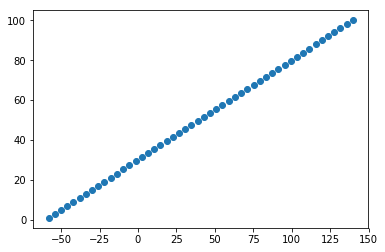

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y, x)
plt.show()

In [171]:
w,b,costs = Linear(x, y, 1, 1, itera=300)

print (w, b)

[[ 1.78189344]] [[ 0.91426258]]


In [107]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
